# Hill Climbing

---

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [7]:
import gym
import numpy as np
from collections import deque
from AdaptiveNoiseHillClimbingAgent import AdaptiveNoiseHillClimbingAgent
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Policy

In [8]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(4,)
action space: Discrete(2)


### 3. Train the Agent with Stochastic Policy Search

In [9]:
env = gym.make('CartPole-v0')
env.seed()
np.random.seed()


def hill_climbing(agent, numberOfEpisodes=2000, max_t=1000, print_every=100):
    """Implementation of hill climbing with adaptive noise scaling.
        
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): how often to print average score (over last 100 episodes)
    """
    scoresDeque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, numberOfEpisodes+1):
        state = env.reset()
        rewards = []
        for t in range(max_t):
            action = agent.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 

        agent.update(rewards)

        scoresDeque.append(sum(rewards))
        scores.append(sum(rewards))
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scoresDeque)))
        if np.mean(scoresDeque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scoresDeque)))
            break
        
    return scores

In [10]:
# Create Adaptive Noise Hill Climbing Agent
agent = AdaptiveNoiseHillClimbingAgent(4, 2)
scores = hill_climbing(agent)

Episode 100	Average Score: 36.89
Environment solved in 88 episodes!	Average Score: 196.78


### 4. Plot the Scores

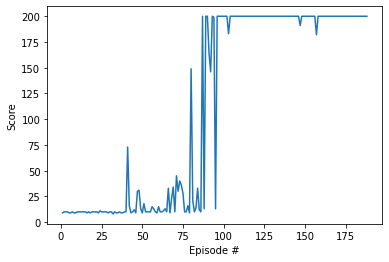

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [12]:
env = gym.make('CartPole-v0')
env.seed()
np.random.seed()
state = env.reset()
for t in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()